In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame, concat

import os
path='E:\【ML_DL】\【服装项目】\dataset\shopN\data\shop_'

销售数据取自data_full.7z中的'sale_XXX.csv'系列csv文件，将所有sale数据进行合并。一共有638家店铺，其中取出：拥有数据数目大于100条可以用于lstm时序预测、以及日期可以满足预测条件的店铺，用shop_newest_len100表示       

In [2]:
shop_newest_len100 = [1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 70, 72, 75, 76, 77, 78, 81, 83, 85, 86, 88, 89, 90, 91, 93, 94, 95, 100, 101, 105, 106, 107, 110, 111, 114, 115, 121, 122, 125, 127, 128, 132, 133, 134, 135, 146, 147, 151, 156, 157, 158, 159, 160, 162, 163, 164, 167, 169, 170, 172, 178, 179, 183, 185, 186, 189, 196, 199, 200, 201, 205, 206, 209, 218, 221, 223, 225, 233, 234, 237, 239, 246, 250, 260, 272, 299, 308, 311, 321, 451, 481]

保存每个店铺的数据长度

In [3]:
shop_length = []# 保存每个店铺的数据长度
for id in shop_newest_len100:
    df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
    shop_length.append(len(df))

In [4]:
shop_length[:10]

[225, 558, 558, 446, 366, 331, 513, 177, 362, 497]

这里随机选取第7个店铺进行展示

In [3]:
id = 7# 这里随机选取第7个店铺进行展示
df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
# df=df.drop(['sale_date'],axis=1)
len(df)

513

In [4]:
df[:5]

,sale_date,sale_price,Quantity
0,2009-01-05,26167.5,85.0
1,2009-01-12,26142.0,81.0
2,2009-01-19,36358.0,98.0
3,2009-01-26,20479.0,56.0
4,2009-02-02,9280.0,35.0


In [5]:
df['sale_date']=pd.to_datetime(df['sale_date'], format="%Y/%m/%d")
df.set_index('sale_date', inplace=True)

In [6]:
df[:5]

,sale_price,Quantity
sale_date,,
2009-01-05,26167.5,85.0
2009-01-12,26142.0,81.0
2009-01-19,36358.0,98.0
2009-01-26,20479.0,56.0
2009-02-02,9280.0,35.0


In [7]:
df = df.resample('m').sum()

In [8]:
df[:5]

,sale_price,Quantity
sale_date,,
2009-01-31,109146.5,320.0
2009-02-28,45340.0,153.0
2009-03-31,82145.0,219.0
2009-04-30,123631.5,385.0
2009-05-31,85404.0,338.0


In [10]:
len(df)

118

进行简单的二阶拟合

In [9]:
x = df['Quantity'][:111].values
Y = df['sale_price'][:111].values

          2
-0.04208 x + 652.7 x - 2.776e+04


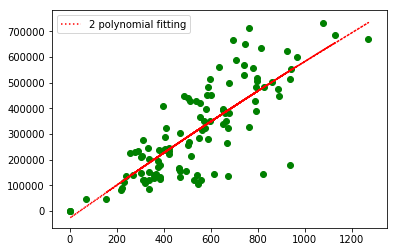

In [10]:
coef2 = np.polyfit(x,Y, 2)
poly_fit2 = np.poly1d(coef2)
plt.plot(x, poly_fit2(x), 'r:',label="2 polynomial fitting")
print(poly_fit2)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

误差计算

In [11]:
# 定义相对误差的计算
def mean_squared_error01(a,b):
    e=[]
    for i in range(len(a)):
        dif = a[i]-b[i]
        e1 = abs(dif / b[i])
        e.append(e1)
    return e

In [12]:
y_true = df['sale_price'][111:].values
y_true

array([237721., 148735., 162138., 170305., 132163., 119566., 126465.])

In [13]:
y_pred = poly_fit2(df['Quantity'][111:].values)
y_pred

array([244496.72353645, 172406.93346728, 196147.27277826, 211699.6446187 ,
       125827.00606518, 102999.8729856 ,  96639.64692456])

In [14]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.15053605801358996

三阶多项式拟合

            3          2
-0.0003015 x + 0.4917 x + 391.4 x + 3709


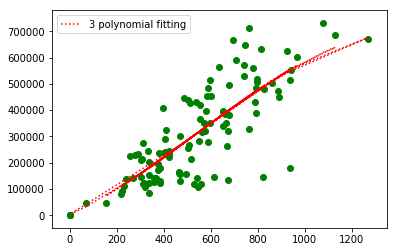

In [15]:
coef3 = np.polyfit(x,Y, 3)
poly_fit3 = np.poly1d(coef3)
plt.plot(x, poly_fit3(x), 'r:',label="3 polynomial fitting")
print(poly_fit3)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [16]:
y_pred = poly_fit3(df['Quantity'][111:].values)
y_pred

array([238306.51312156, 165140.09063539, 188627.54979095, 204360.50403899,
       121220.65287128, 100900.38484929,  95394.00575297])

In [17]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.14426364761357688